In [7]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library import HGate

# 1-qubit QuantumCircuitを作成します
qc = QuantumCircuit(3)

# いくつかのゲートを追加します
qc.h(0)
qc.h(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# DAGの各ノードを調べます
for node in dag.topological_op_nodes():
    print(f"The depth of H gate on qubit 0 is {node._node_id}")


The depth of H gate on qubit 0 is 6
The depth of H gate on qubit 0 is 8
The depth of H gate on qubit 0 is 7
The depth of H gate on qubit 0 is 9


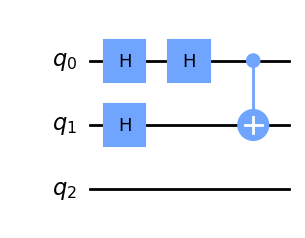

In [8]:
qc.draw('mpl')

In [9]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library import HGate, CXGate

# 2-qubit QuantumCircuitを作成します
qc = QuantumCircuit(2)

# ゲートを追加します
qc.h(0)
qc.h(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# DAGの各ノードを調べます
gate_depths = {}
for node in dag.topological_op_nodes():
    if isinstance(node.op, (HGate, CXGate)):
        gate_depths[node.name + str(node._node_id)] = dag.depth_for_node(node)

# ゲートの深さを出力します
for gate, depth in gate_depths.items():
    print(f"The depth of {gate} is {depth}")


AttributeError: 'DAGCircuit' object has no attribute 'depth_for_node'

In [20]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library import HGate, CXGate

# 2-qubit QuantumCircuitを作成します
qc = QuantumCircuit(2)

# ゲートを追加します
qc.h(0)
qc.h(1)
qc.cx(1,0)
qc.x(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# 各レイヤー（深さ）でのゲートの名前を取得します
layers = dag.serial_layers()
gate_depths = {}

for depth, layer in enumerate(layers):
    for node in layer['graph'].topological_op_nodes():
        if isinstance(node.op, (HGate, CXGate)):
            gate_depths[node.name + "_" + str(node._node_id)] = depth

# ゲートの深さを出力します
for gate, depth in gate_depths.items():
    print(f"The depth of {gate} is {depth}")


The depth of h_4 is 3
The depth of cx_4 is 5


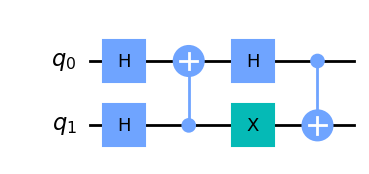

In [13]:
qc.draw('mpl')

In [21]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
from qiskit.dagcircuit import DAGCircuit

# 2-qubit QuantumCircuitを作成します
qc = QuantumCircuit(2)

# ゲートを追加します
qc.h(0)
qc.h(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# DAGを描画します
dag_drawer(dag)

# 各レイヤー（深さ）でのゲートの名前を取得します
layers = dag.serial_layers()

for depth, layer in enumerate(layers):
    print(f"Layer {depth}:")
    for node in layer['graph'].topological_op_nodes():
        print(f"  {node.op.name}")


MissingOptionalLibraryError: "The 'PyDot' library is required to use 'dag_drawer'. You can install it with 'pip install pydot'."